# LOAN PREDICTION AND ANALYSIS

* This project embarked on with the aim to build a machine learning model that can predict if a loan will be awarded or not to a client and also to perform basic data analysis to generate better insight from the data

In [1]:
# LIBRARIES FOR LOADING DATASET AND DATA ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from warnings import simplefilter
simplefilter(action="ignore")

C:\Users\Isaac\AppData\Local\Temp\ipykernel_11812\3092822172.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport



Two set of data were provided:
1. The train data which will be used for data analysis, preprocessed and fed into the ML algorithm 
2. The test data which will be used to validate the performance of the model

In [2]:
# Loading train set
train_set_pth = "../data/raw/train_ctrUa4K.csv"
df = pd.read_csv(train_set_pth, index_col="Loan_ID")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Exploration and Analysis
* This section will intimate reviewers with data
* pandas_profiling will be used to generate a general summary of hidden insight about the data 
* Other section will further dig deeper to uncover the data

In [11]:
# Data dimension
df.shape

(614, 12)

In [3]:
"""
- Generating an analytical report to give an overview of the dataset which includes;
1. missing data
2. data type
3. correlation between features
4. Cardinality
5. collinearity
6. scale of features
"""
profile = ProfileReport(df, title="Pandas Profiling of the Loan Dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# quantitative analysis of the missing values across the features
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Checking if dropping missing values rowwise for the columns with higher missing value will have a significant effect on the amount of missing values dropped in other columns and the quantity of end data

In [7]:
# Impact of dropping missing value across credit history
print(df.dropna(subset=["Credit_History"]).isna().sum(), end="\n\n")
print("shape: {}".format(df.dropna(subset=["Credit_History"]).shape))

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

shape: (564, 12)


In [8]:
# Impact of dropping missing value across Gender
print(df.dropna(subset=["Gender"]).isna().sum(), end="\n\n")
print("shape: {}".format(df.dropna(subset=["Gender"]).shape))

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

shape: (601, 12)


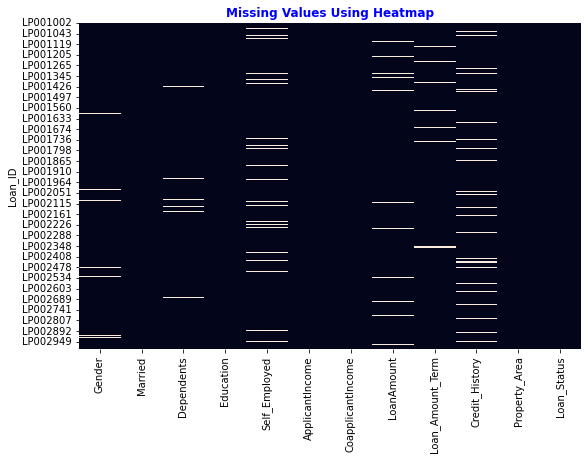

In [11]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Using Heatmap", color="b", weight="bold");

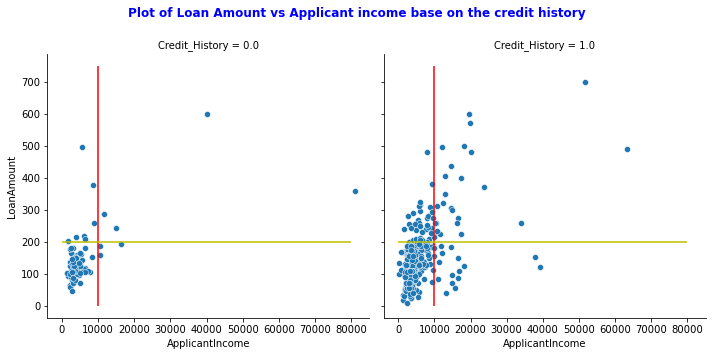

In [20]:
# relationship between applicant income and loan amount
plot = sns.relplot(x="ApplicantIncome", y="LoanAmount", data=df, col="Credit_History")
plot.fig.subplots_adjust(top=0.85)
plot.fig.suptitle("Plot of Loan Amount vs Applicant income base on the credit history", color="b", weight="bold");
for ax in plot.axes.flat:
    ax.vlines([10000], ymin=[0], ymax=[750], color="r")
    ax.hlines([200], xmin=[0], xmax=[80000], color="y")

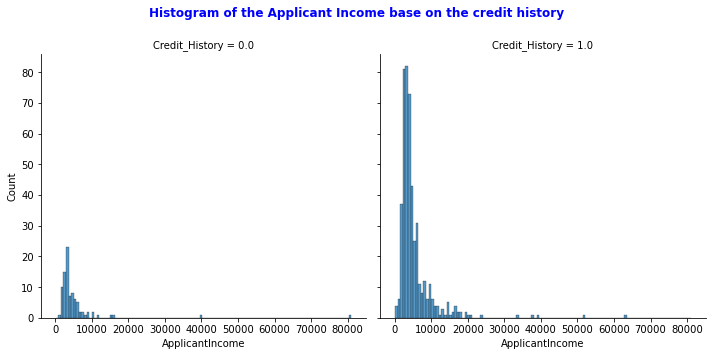

In [23]:
plot = sns.displot(x="ApplicantIncome", data=df, col="Credit_History")
plot.fig.subplots_adjust(top=0.85)
plot.fig.suptitle("Histogram of the Applicant Income base on the credit history", color="b", weight="bold");

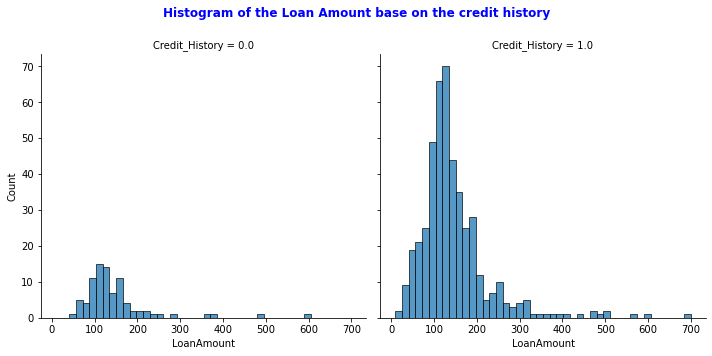

In [27]:
plot = sns.displot(x="LoanAmount", data=df, col="Credit_History")
plot.fig.subplots_adjust(top=0.85)
plot.fig.suptitle("Histogram of the Loan Amount base on the credit history", color="b", weight="bold");

           mean  median
Gender                 
Female  4643.47  3583.0
Male    5446.46  3865.0


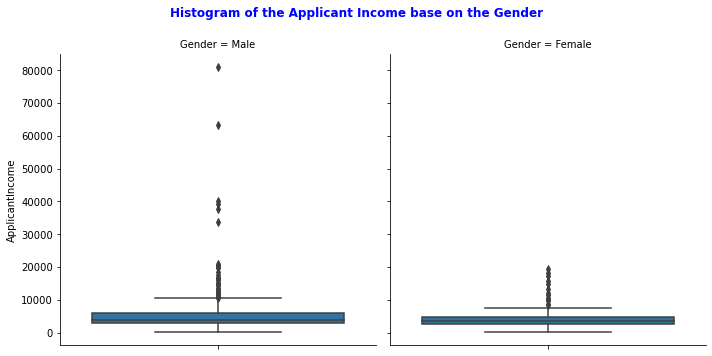

In [34]:
plot = sns.catplot(y="ApplicantIncome", data=df, col="Gender", kind="box")
plot.fig.subplots_adjust(top=0.85)
plot.fig.suptitle("Histogram of the Applicant Income base on the Gender", color="b", weight="bold");

print(df.groupby("Gender")["ApplicantIncome"].agg(["mean","median"]).round(2))

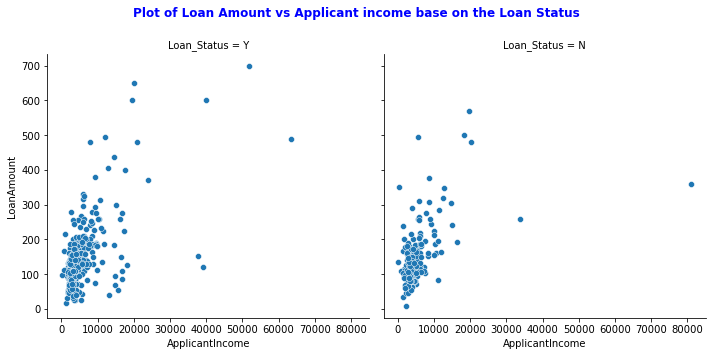

In [36]:
plot = sns.relplot(x="ApplicantIncome", y="LoanAmount", data=df, col="Loan_Status")
plot.fig.subplots_adjust(top=0.85)
plot.fig.suptitle("Plot of Loan Amount vs Applicant income base on the Loan Status", color="b", weight="bold");

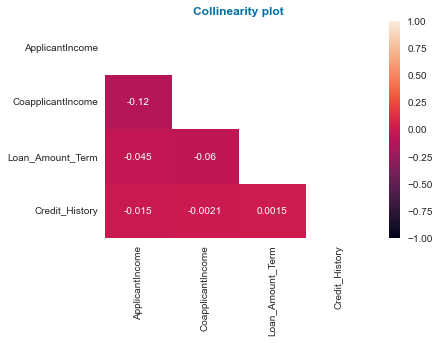

In [176]:
corr = df.drop(columns="LoanAmount").corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True)
plt.title(label="Collinearity plot", color="b", weight="bold");

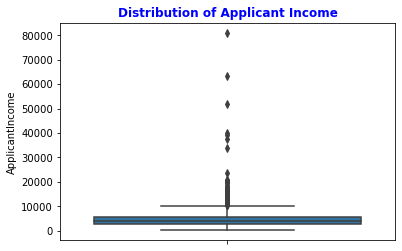

In [32]:
sns.boxplot(y="ApplicantIncome", data=df)
plt.title(label="Distribution of Applicant Income", color="b", weight="bold");

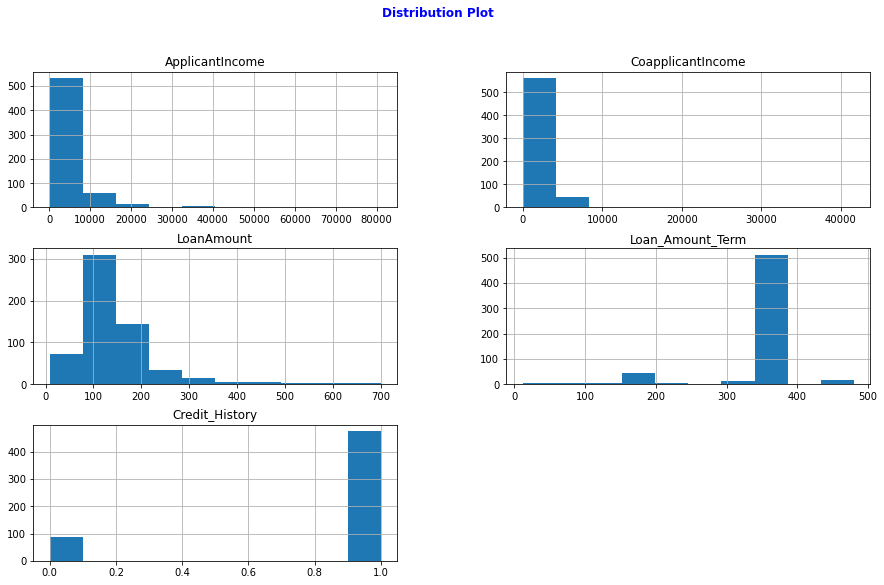

In [43]:
fig, ax = plt.subplots(figsize=(15,9))
df.hist(ax=ax)
fig.suptitle("Distribution Plot", color="b", weight="bold");

In [44]:
# Quantifying the loan amount term
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [49]:
# Effect on dependents on application for loan
df.Dependents.value_counts(normalize=True).round(2).mul(100)

0     58.0
1     17.0
2     17.0
3+     9.0
Name: Dependents, dtype: float64

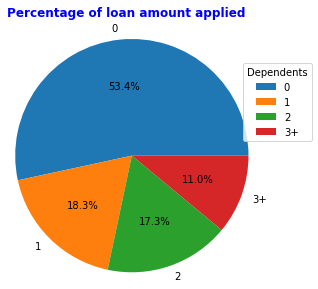

In [73]:
# Percentage of loan amount applied to base on the number of dependents
val = (df.groupby("Dependents")["LoanAmount"]
 .sum()
 .divide(df.LoanAmount.sum())
 .mul(100)
 )
fig, ax = plt.subplots()
ax.pie(val, labels=val.index, autopct="%1.1f%%", radius=1.5)
ax.legend(title="Dependents", loc="upper right", bbox_to_anchor=(1.45, 1))
fig.subplots_adjust(top=0.80)
fig.suptitle("Percentage of loan amount applied", color="b", weight="bold");

In [111]:
# Statistics of applicant income and loan amount base on employment status
df.groupby("Self_Employed", dropna=False)[["ApplicantIncome", "LoanAmount"]].agg(["mean", "median"]).round(2)

ApplicantIncome         LoanAmount       
                         mean  median       mean median
Self_Employed                                          
No                    5049.75  3705.5     141.75  125.0
Yes                   7380.82  5809.0     172.00  150.0
NaN                   5863.22  3659.5     153.71  125.0

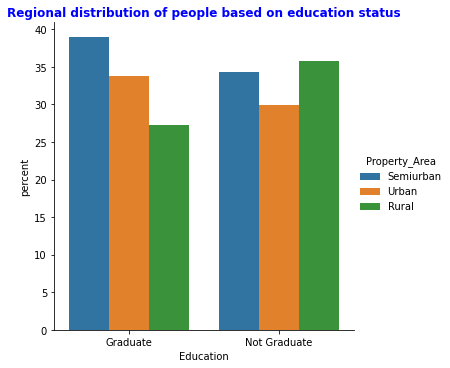

In [113]:
(df.groupby("Education")["Property_Area"]
 .value_counts(normalize=True)
 .mul(100)
 .rename("percent")
 .reset_index()
 .pipe((sns.catplot, "data"), x="Education", y="percent", hue="Property_Area", kind="bar")
 )
plt.title("Regional distribution of people based on education status", weight="bold", color="b");

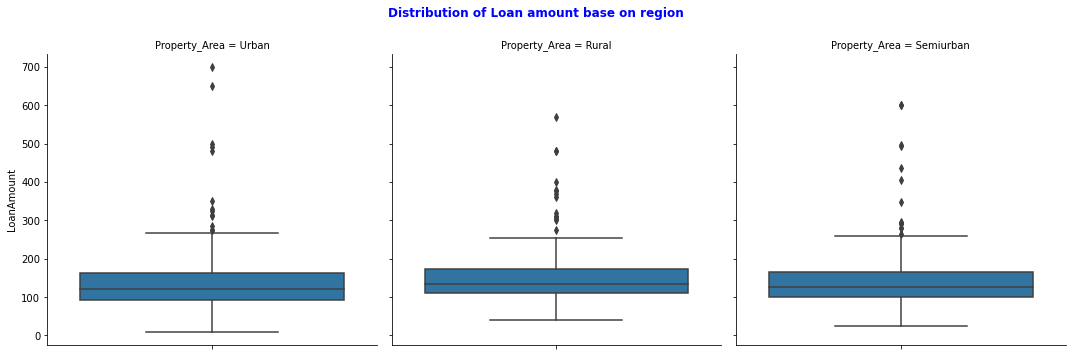

In [115]:
plot = sns.catplot(y="LoanAmount", col="Property_Area", data=df, kind="box")
plot.fig.subplots_adjust(top=0.85)
plot.fig.suptitle("Distribution of Loan amount base on region", color="b", weight="bold");

In [116]:
# Percentage count of property area
df.Property_Area.value_counts(normalize=True).mul(100).round(2)

Semiurban    37.95
Urban        32.90
Rural        29.15
Name: Property_Area, dtype: float64

In [60]:
# Descriptive analysis of the qualitative analysis
df.describe(include=np.object).T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


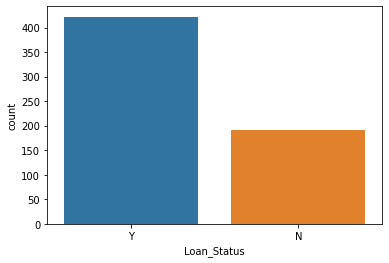

In [21]:
# Checking the balance of the data
sns.countplot(data=df, x="Loan_Status");

In [27]:
(df.Loan_Status
 .value_counts(normalize=True)
 .mul(100)
 .round(2)
 )

Y    68.73
N    31.27
Name: Loan_Status, dtype: float64

In [32]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Preparing data for use by the model

In [146]:
# Libraries from sklearn for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

In [118]:
# Creating variable with columns with numerical data type
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [119]:
# Creating variable with columns with categorical data type
cat_cols = df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [151]:
# Creating a copy of raw data
df_preprocessed = df.copy()

In [152]:
"""
Creating a pipeline for preprocessing the data base on the data type
1. using min max scaler to but the range of the numerical variable between 0 and 1
2. using ordinal encoder to convert the categorical data to ordinal data type 
"""
pipe_num = make_pipeline(MinMaxScaler())
pipe_cat = make_pipeline(OrdinalEncoder())

In [153]:
# Applying the pipelines to the data base on the data type
col_transformer = ColumnTransformer([("num",pipe_num, num_cols), ("cat", pipe_cat, cat_cols)])
df_preprocessed = col_transformer.fit_transform(df_preprocessed)

In [154]:
# combining the separate columns used in the preprocessing the data
cols = np.concatenate([num_cols,cat_cols])

In [155]:
# changing the data from numpy arrays to pandas dataframe
df_preprocessed = pd.DataFrame(data=df_preprocessed, index=df.index, columns=cols)
df_preprocessed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.070489,0.000000,NaN,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
LP001003,0.054830,0.036192,0.172214,0.74359,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
LP001005,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
LP001006,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
LP001008,0.072356,0.000000,0.191027,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [156]:
# dropping the loan amount because of it high collinearity with the applicant income
df_preprocessed.drop(columns="LoanAmount", inplace=True)

In [157]:
"""
Self employed as two values which is yes and no
and the third value is nan which could be individual that are unemployed 
which is not accounted for in the data
to account for this third value rather than dropping it, I will be replacing with 2
"""
df_preprocessed.Self_Employed.value_counts(dropna=False)

0.0    500
1.0     82
NaN     32
Name: Self_Employed, dtype: int64

In [158]:
# Filling the missing value in self employed with 2
df_preprocessed.Self_Employed.fillna(2, inplace=True)

In [159]:
# confirming that the process above as been effected
df_preprocessed.Self_Employed.value_counts(dropna=False)

0.0    500
1.0     82
2.0     32
Name: Self_Employed, dtype: int64

In [160]:
# checking the missing value in dependents
df_preprocessed.Dependents.value_counts(dropna=False)

0.0    345
1.0    102
2.0    101
3.0     51
NaN     15
Name: Dependents, dtype: int64

In [161]:
# Filling the missing value in dependents with 4
df_preprocessed.Dependents.fillna(4, inplace=True)

In [162]:
# checking the missing value in Gender
df_preprocessed.Gender.value_counts(dropna=False)

1.0    489
0.0    112
NaN     13
Name: Gender, dtype: int64

In [163]:
# Filling the missing value in dependents with 2
df_preprocessed.Gender.fillna(2, inplace=True)

In [164]:
df_preprocessed.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       50
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
Loan_Status           0
dtype: int64

In [165]:
df_preprocessed.Loan_Status.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [166]:
"""
It is very difficult to determine what should be the probable impute 
for missing values across the numerical data set.
Hence, to make meaningful guess we are going to make use of some advance techniques which is the statistical
imputation.
The idea is to split the data base on the loan status has it is expected that columns with similar loan
status should have similar relationship hence, using a knn imputation along columns with similar loan
status should yield a better model.
"""

imputter = KNNImputer(n_neighbors=11)

yes = df_preprocessed[df_preprocessed["Loan_Status"] == 1]
no = df_preprocessed[df_preprocessed["Loan_Status"] == 0]

ind = np.concatenate([yes.index, no.index])
cols = yes.columns

yes = imputter.fit_transform(yes)

no = imputter.fit_transform(no)

df_preprocessed = np.concatenate([yes, no], axis=0)

df_preprocessed = pd.DataFrame(df_preprocessed, index=ind, columns=cols)

# df_preprocessed.fillna(-9999, inplace=True)
df_preprocessed.head()


,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
LP001002,0.070489,0.000000,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
LP001005,0.035250,0.000000,0.74359,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
LP001006,0.030093,0.056592,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
LP001008,0.072356,0.000000,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
LP001011,0.065145,0.100703,0.74359,1.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0


In [167]:
# inspecting the missing values after preprocessing
df_preprocessed.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [168]:
# Saving the preprocessed file in the directory below
df_preprocessed.to_csv("..\data\processed\df_preprocessed.csv")

# Finding a Baseline model
* This section makes use of pycaret to decide which model can be used as a base model based on data

In [169]:
# automl library
from pycaret.classification import *

In [174]:
# setup our experiment and pulling out the result
exp_name = setup(data=df_preprocessed, 
                 target="Loan_Status", 
                 session_id=123, 
                 preprocess=False, 
                 train_size=.75
                 )
results = pull()
results

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Original data shape,"(614, 11)"
4,Transformed data shape,"(614, 11)"
5,Transformed train set shape,"(460, 11)"
6,Transformed test set shape,"(154, 11)"
7,Numeric features,10


In [175]:
# comparing the performance of the models to see the model that out performed the others
best_model = compare_models(n_select=5)
results = pull()
results

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:48:07
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8283,0.7757,0.9778,0.8132,0.8874,0.5361,0.5828,5.3950
nb,Naive Bayes,0.8174,0.7755,0.9527,0.8164,0.8783,0.5181,0.5487,0.8020
svm,SVM - Linear Kernel,0.8152,0.0000,0.9463,0.8162,0.8755,0.5195,0.5524,0.9220
knn,K Neighbors Classifier,0.7739,0.7115,0.9527,0.7740,0.8531,0.3825,0.4316,1.0900
dt,Decision Tree Classifier,0.7391,0.7137,0.7817,0.8291,0.8034,0.4147,0.4181,0.9270


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8304,0.7488,0.9778,0.8155,0.8887,0.5423,0.5882,1.133
lr,Logistic Regression,0.8283,0.7757,0.9778,0.8132,0.8874,0.5361,0.5828,5.395
ridge,Ridge Classifier,0.8283,0.0000,0.9778,0.8132,0.8874,0.5361,0.5828,0.970
ada,Ada Boost Classifier,0.8196,0.7545,0.9365,0.8272,0.8774,0.5365,0.5604,1.715
nb,Naive Bayes,0.8174,0.7755,0.9527,0.8164,0.8783,0.5181,0.5487,0.802
svm,SVM - Linear Kernel,0.8152,0.0000,0.9463,0.8162,0.8755,0.5195,0.5524,0.922
rf,Random Forest Classifier,0.8087,0.7862,0.9147,0.8283,0.8679,0.5204,0.5387,3.555
gbc,Gradient Boosting Classifier,0.8065,0.7686,0.9239,0.8207,0.8683,0.5054,0.5237,1.709
qda,Quadratic Discriminant Analysis,0.8043,0.7488,0.9339,0.8128,0.8682,0.4927,0.5165,1.175
et,Extra Trees Classifier,0.7957,0.7603,0.8959,0.8253,0.8578,0.4946,0.5059,3.894
